In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-11-21 16:50:12.582218: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 16:50:12.689146: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 16:50:12.689191: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 16:50:12.689246: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already b

In [2]:
data = pd.read_csv('Dataset/panen.csv')

In [3]:
data

,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton),curah hujan
0,Januari,38111,15.00,90.30,343.70
1,Februari,38111,1948.00,11767.87,201.10
2,Maret,38111,24877.00,151724.82,262.80
3,April,38111,5218.00,32095.92,197.20
4,Mei,38111,671.00,3983.73,206.70
5,Juni,38111,2591.00,59735.42,128.00
6,Juli,38111,2874.00,63961.14,91.70
7,Agustus,38111,974.00,17902.15,35.00
8,September,38111,671.00,16069.38,0.00
9,Oktober,38111,1581.00,9797.46,15.06


In [4]:
data.shape
#X= 59 -> input
#y= 10 -> fitur/parameter

(60, 5)

In [5]:
data.info

<bound method DataFrame.info of         Bulan  Luas Lahan  Luas Panen (ha)  Produksi Padi (ton)  curah hujan
0     Januari       38111            15.00                90.30       343.70
1    Februari       38111          1948.00             11767.87       201.10
2       Maret       38111         24877.00            151724.82       262.80
3       April       38111          5218.00             32095.92       197.20
4         Mei       38111           671.00              3983.73       206.70
5        Juni       38111          2591.00             59735.42       128.00
6        Juli       38111          2874.00             63961.14        91.70
7     Agustus       38111           974.00             17902.15        35.00
8   September       38111           671.00             16069.38         0.00
9     Oktober       38111          1581.00              9797.46        15.06
10   November       38111           891.00              6504.30       161.80
11   Desember       38111            97.00  

In [6]:
month_mapping = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

In [7]:
data['Bulan'] = data['Bulan'].map(month_mapping)
data

,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton),curah hujan
0,1,38111,15.00,90.30,343.70
1,2,38111,1948.00,11767.87,201.10
2,3,38111,24877.00,151724.82,262.80
3,4,38111,5218.00,32095.92,197.20
4,5,38111,671.00,3983.73,206.70
5,6,38111,2591.00,59735.42,128.00
6,7,38111,2874.00,63961.14,91.70
7,8,38111,974.00,17902.15,35.00
8,9,38111,671.00,16069.38,0.00
9,10,38111,1581.00,9797.46,15.06


In [8]:
## Parameter/Fitur
X = data[['Bulan', 'curah hujan', 'Luas Panen (ha)','Luas Lahan']]
## Target
y = data['Produksi Padi (ton)']

# Split

In [9]:
test_split=round(len(data)*0.80)
data_training=data[:90]
data_testing=data[10:]
print(data_training.shape)
print(data_testing.shape)

(60, 5)
(50, 5)


In [10]:
data_training.shape

(60, 5)

In [11]:
scaler = MinMaxScaler()
data_training_scaled = scaler.fit_transform(data_training)
data_testing_scaled=scaler.transform(data_testing)
data_training_scaled, data_testing_scaled

(array([[0.        , 0.96323833, 0.        , 0.        , 0.9197217 ],
        [0.09090909, 0.96323833, 0.07774918, 0.07538619, 0.53813219],
        [0.18181818, 0.96323833, 1.        , 0.97889793, 0.70323789],
        [0.27272727, 0.96323833, 0.2092752 , 0.20661677, 0.52769601],
        [0.36363636, 0.96323833, 0.02638565, 0.02513458, 0.55311747],
        [0.45454545, 0.96323833, 0.10361194, 0.38504745, 0.34252074],
        [0.54545455, 0.96323833, 0.11499477, 0.41232717, 0.245384  ],
        [0.63636364, 0.96323833, 0.03857292, 0.1149869 , 0.09365801],
        [0.72727273, 0.96323833, 0.02638565, 0.10315519, 0.        ],
        [0.81818182, 0.96323833, 0.06298769, 0.06266593, 0.04029971],
        [0.90909091, 0.96323833, 0.03523449, 0.04140648, 0.43296762],
        [1.        , 0.96323833, 0.00329821, 0.00348734, 0.93738293],
        [0.        , 1.        , 0.01155016, 0.01225222, 1.        ],
        [0.09090909, 1.        , 0.10830665, 0.11513512, 0.65132459],
        [0.18181818,

In [12]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i, 3])
    return np.array(dataX),np.array(dataY)
X_train,y_train=createXY(data_training_scaled,6)
X_test,y_test=createXY(data_testing_scaled,6)

In [13]:
print("trainX Shape-- ",X_train.shape)
print("trainY Shape-- ",y_train.shape)

trainX Shape--  (54, 6, 5)
trainY Shape--  (54,)


In [14]:
print("testX Shape-- ",X_test.shape)
print("testY Shape-- ",y_test.shape)

testX Shape--  (44, 6, 5)
testY Shape--  (44,)


In [15]:
print("trainX[0]-- \n",X_train[0])
print("trainY[0]-- ",y_train[0])

trainX[0]-- 
 [[0.         0.96323833 0.         0.         0.9197217 ]
 [0.09090909 0.96323833 0.07774918 0.07538619 0.53813219]
 [0.18181818 0.96323833 1.         0.97889793 0.70323789]
 [0.27272727 0.96323833 0.2092752  0.20661677 0.52769601]
 [0.36363636 0.96323833 0.02638565 0.02513458 0.55311747]
 [0.45454545 0.96323833 0.10361194 0.38504745 0.34252074]]
trainY[0]--  0.4123271744372134


In [16]:
X_train.shape[1], X_test.shape[2], X_train.shape[0]

(6, 5, 54)

In [17]:
# from sklearn.model_selection import TimeSeriesSplit
# tss = TimeSeriesSplit(n_splits = 3)
# for train_index, test_index in tss.split(X):
#     X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [18]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()

In [19]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(54, 6, 5)

# RNN 

In [20]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn import metrics
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(LSTM(4, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(8, return_sequences=False))
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(optimizer=AdamW(learning_rate=0.0001), loss='mean_squared_error')
# model.compile(loss=mean_squared_error, optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model.fit(X_train, y_train, epochs=250, batch_size=8, validation_data=(X_test, y_test), callbacks=EarlyStopping(monitor='loss', patience=3))
# model.fit(X_train, y_train, epochs=250, batch_size=8, validation_data=(X_test, y_test))
model.summary()

# Baru
model = Sequential()
model.add(LSTM(75,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=250, batch_size=7, validation_data=(X_test, y_test), callbacks=EarlyStopping(monitor='loss', patience=3))

Epoch 1/250
7/7 [==============================] - 8s 250ms/step - loss: 0.1035 - val_loss: 0.0999
Epoch 2/250
7/7 [==============================] - 0s 31ms/step - loss: 0.1005 - val_loss: 0.0975
Epoch 3/250
7/7 [==============================] - 0s 36ms/step - loss: 0.0996 - val_loss: 0.0950
Epoch 4/250
7/7 [==============================] - 0s 24ms/step - loss: 0.0968 - val_loss: 0.0926
Epoch 5/250
7/7 [==============================] - 0s 26ms/step - loss: 0.0981 - val_loss: 0.0901
Epoch 6/250
7/7 [==============================] - 0s 29ms/step - loss: 0.0897 - val_loss: 0.0877
Epoch 7/250
7/7 [==============================] - 0s 21ms/step - loss: 0.0917 - val_loss: 0.0853
Epoch 8/250
7/7 [==============================] - 0s 24ms/step - loss: 0.0846 - val_loss: 0.0831
Epoch 9/250
7/7 [==============================] - 0s 33ms/step - loss: 0.0890 - val_loss: 0.0811
Epoch 10/250
7/7 [==============================] - 0s 27ms/step - loss: 0.0829 - val_loss: 0.0792
Epoch 11/250
7/7 [

In [21]:
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense
# from tensorflow.keras.optimizers import Adam, Adadelta
# from sklearn import metrics
# from keras.callbacks import EarlyStopping

# def build_model(optimizer=Adam(), batch_size=16, epochs=8):
#     model = Sequential()
#     model.add(LSTM(50, return_sequences=True, input_shape=(6, 4)))
#     model.add(LSTM(50))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))
#     model.compile(loss='mse', optimizer=optimizer)
#     return model

# grid_model = KerasRegressor(build_fn=build_model, verbose=1)

# parameters = {
#     'batch_size': [16, 20],
#     'epochs': [8, 10],
#     'optimizer': [Adam(), Adadelta()]
# }

# grid_search = GridSearchCV(estimator=grid_model, param_grid=parameters, cv=2)

# grid_search = grid_search.fit(X_train, y_train)


In [22]:
# train_loss = hist.history['loss']
# val_loss = hist.history['val_loss']

# epochs = range(1, len(train_loss) + 1)
# plt.plot(epochs, train_loss, label='Training Loss')
# plt.plot(epochs, val_loss, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [23]:
prediction = model.predict(X_test)
prediction

2/2 [==============================] - 1s 6ms/step


array([[0.09663129],
       [0.0915567 ],
       [0.08840322],
       [0.09111175],
       [0.09338132],
       [0.09970175],
       [0.10540348],
       [0.10938554],
       [0.11534531],
       [0.11882548],
       [0.11564845],
       [0.11048111],
       [0.10393059],
       [0.0961187 ],
       [0.0849198 ],
       [0.0885933 ],
       [0.09378099],
       [0.1002088 ],
       [0.10580847],
       [0.10827327],
       [0.11032917],
       [0.11059641],
       [0.10829291],
       [0.10426953],
       [0.09888053],
       [0.0943864 ],
       [0.08881736],
       [0.089221  ],
       [0.09141174],
       [0.09542274],
       [0.09712347],
       [0.0985679 ],
       [0.10104773],
       [0.1002789 ],
       [0.0949733 ],
       [0.09085742],
       [0.08734743],
       [0.08043459],
       [0.0687984 ],
       [0.07010604],
       [0.07088022],
       [0.07367827],
       [0.07815207],
       [0.08076104]], dtype=float32)

In [24]:
prediction.shape

(44, 1)

In [25]:
# scaler.inverse_transform(prediction)
prediction_copies_array = np.repeat(prediction,5, axis=-1)
prediction_copies_array

array([[0.09663129, 0.09663129, 0.09663129, 0.09663129, 0.09663129],
       [0.0915567 , 0.0915567 , 0.0915567 , 0.0915567 , 0.0915567 ],
       [0.08840322, 0.08840322, 0.08840322, 0.08840322, 0.08840322],
       [0.09111175, 0.09111175, 0.09111175, 0.09111175, 0.09111175],
       [0.09338132, 0.09338132, 0.09338132, 0.09338132, 0.09338132],
       [0.09970175, 0.09970175, 0.09970175, 0.09970175, 0.09970175],
       [0.10540348, 0.10540348, 0.10540348, 0.10540348, 0.10540348],
       [0.10938554, 0.10938554, 0.10938554, 0.10938554, 0.10938554],
       [0.11534531, 0.11534531, 0.11534531, 0.11534531, 0.11534531],
       [0.11882548, 0.11882548, 0.11882548, 0.11882548, 0.11882548],
       [0.11564845, 0.11564845, 0.11564845, 0.11564845, 0.11564845],
       [0.11048111, 0.11048111, 0.11048111, 0.11048111, 0.11048111],
       [0.10393059, 0.10393059, 0.10393059, 0.10393059, 0.10393059],
       [0.0961187 , 0.0961187 , 0.0961187 , 0.0961187 , 0.0961187 ],
       [0.0849198 , 0.0849198 , 0.

In [26]:
prediction_copies_array.shape

(44, 5)

In [27]:
label = scaler.inverse_transform(np.repeat(y_test.reshape(-1, 1), 5, axis=-1))[:, 3]

In [28]:
pred = scaler.inverse_transform(prediction_copies_array)[:, 3]

In [29]:
# pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),4)))[:,2]

In [30]:
# original_copies_array = np.repeat(y_test,4, axis=-1)
# original=scaler.inverse_transform(np.reshape(original_copies_array,(len(y_test),4)))[:,2]

In [31]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,label)

Pred Values--  [15058.805  14272.734  13784.251  14203.811  14555.373  15534.429
 16417.646  17034.48   17957.67   18496.758  18004.625  17204.19
 16189.491  14979.402  13244.657  13813.693  14617.284  15612.974
 16480.38   16862.186  17180.652  17222.049  16865.229  16241.994
 15407.22   14711.064  13848.401  13910.927  14250.279  14871.598
 15135.045  15358.793  15742.927  15623.832  14801.978  14164.413
 13620.704  12549.883  10747.398  10949.956  11069.879  11503.307
 12196.3125 12600.451 ]

Original Values--  [ 12105.41  65237.1   63868.34  10263.98  16746.45  12801.26   4303.1
    498.52    476.33   4698.   147080.02  44206.87  11366.55  74117.47
  55162.35  21069.22  17115.07   2714.4   19105.2     378.45   1726.2
   6253.2  154993.6   46114.9    5805.3   66146.6   70568.9   26339.8
   9721.8    7921.4   22110.1    2010.9    6963.   114260.    86737.
  17318.    49808.    63853.    33696.    23817.    18106.    18508.
  10568.     1864.  ]


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(y_test, pred)

mae = mean_absolute_error(y_test, pred)

mape = mean_absolute_percentage_error(y_test,pred)

r2 = r2_score(y_test, pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 225147311.42931983
Mean Absolute Error (MAE): 14883.859212586032
Mean Absolute Error (MAPE): 754198.8480969467
r2 Score: -3856052994.840644


In [33]:
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense

# # Define the build_model function with **kwargs to accept hyperparameters
# def build_model(**kwargs):
#     optimizer = kwargs.pop('optimizer', 'adam')  # Get the optimizer, default to 'adam'
#     model = Sequential()
#     model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(LSTM(50, return_sequences=False))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))
#     model.compile(loss='mse', optimizer=optimizer)
#     return model

# # Create the KerasRegressor with build_fn
# grid_model = KerasRegressor(build_fn=build_model, verbose=1)

# # Define the parameter grid for GridSearchCV
# parameters = {
#     'batch_size': [16],
#     'epochs': [10],
#     'optimizer': ['adam']
# }

# # Create GridSearchCV
# grid_search = GridSearchCV(estimator=grid_model, param_grid=parameters, cv=2)
# grid_search = grid_search.fit(X_train, y_train)

# # Access the best model directly
# my_model = grid_search.best_estimator_

# # Make predictions
# prediction = my_model.predict(X_test)
# print("Prediction\n", prediction)
# print("\nPrediction Shape:", prediction.shape)

## Plot Hasil Prediksi

In [34]:
# # Visualisasi data aktual dan prediksi dari model LSTM
# plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Aktual', marker='o')
# plt.plot(y_pred, label='Prediksi LSTM', linestyle='--', marker='x')
# plt.xlabel('Indeks Data')
# plt.ylabel('Nilai Target')
# plt.title('Perbandingan Data Aktual dan Prediksi dari Model LSTM')
# plt.legend()
# plt.grid(True)
# plt.show()

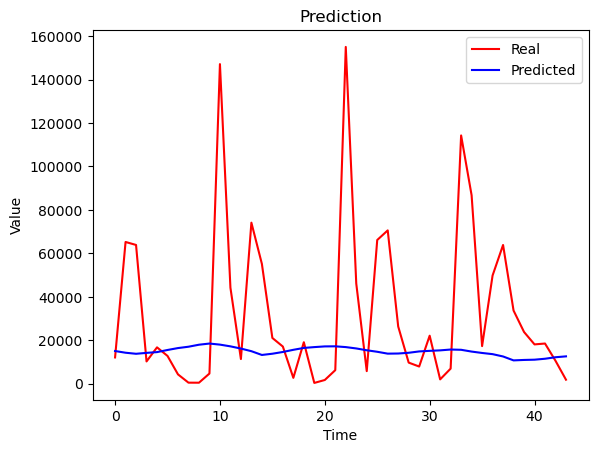

In [35]:
plt.plot(label, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'Predicted')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()